# Entrenamiento de modelos experimental

El principal objetivo de esta notebook es experimentar con diferentes parámetros de los modelos y ver más o menos por dónde se encuentran los parámetros con mejor valor de predicción. Se excluyen los modelos de redes neuronales ya que su API es un poco diferent.

# Importar y cargar datos

In [1]:
import os

from mltools import models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

2024-07-26 15:35:26.657253: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 15:35:26.665387: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 15:35:26.712034: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 15:35:26.765089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 15:35:26.824504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

In [3]:
def generate_datasets_paths(suffix: str = None):
    data_dir = 'data'
    datasets = ["X_train_extended", "X_test_extended", "y_train", "y_test"]
    if suffix:
        datasets = [os.path.join(data_dir, f"{dataset}_{suffix}.csv") for dataset in datasets]
    else:
        datasets = [os.path.join(data_dir, f"{dataset}.csv") for dataset in datasets]
    
    return datasets

In [4]:
def load_datasets(suffix: str = None):
    datasets = generate_datasets_paths(suffix)
    X_train = pd.read_csv(datasets[0])
    X_test = pd.read_csv(datasets[1])
    y_train = pd.read_csv(datasets[2])
    y_test = pd.read_csv(datasets[3])
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = load_datasets()

In [6]:
X_train = X_train.drop(columns=['Type_L', 'Type_M'])
X_test = X_test.drop(columns=['Type_L', 'Type_M'])

In [7]:
y_train = y_train['Failure type']
y_test = y_test['Failure type']

In [8]:
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [K],Rotational power
0,-0.354642,-1.014674,-0.239039,-0.059097,-0.440162,-0.792467,-0.100567
1,-1.651210,-1.486322,0.593600,-0.539312,2.045097,1.102016,-0.295095
2,-1.002926,-1.284187,-1.110534,1.161451,1.400188,0.104919,0.891225
3,-0.753586,0.063378,1.498401,-1.109568,-1.383932,1.600564,-0.751564
4,0.094169,0.400269,-0.599849,0.231034,0.078911,0.404048,0.054690


In [9]:
y_train.value_counts()

Failure type
0    7722
2      85
3      64
4      62
1      34
6      18
5      15
Name: count, dtype: int64

# Experimentos con modelos

## Regresión logística

In [10]:
lr_params = {
    'C': 1.0,                   # Regularization strength; must be a positive float. Smaller values specify stronger regularization.
    'solver': 'lbfgs',          # Solver to use for optimization. 'lbfgs' is suitable for multiclass problems.
    'max_iter': 1000,           # Maximum number of iterations to converge.
    'multi_class': 'multinomial',  # Strategy to handle multiclass classification.
    'random_state': 95,          # Random state for reproducibility.
    'class_weight': 'balanced'  # Weights associated with classes; 'balanced' automatically adjusts weights inversely proportional to class frequencies
}

In [12]:
# Create a ModelWrapper instance for the LogisticRegression model
lr_wrapper = models.ModelWrapper(
    model_class=LogisticRegression,
    params=lr_params,
    name='logistic_regression_multiclass',
)

In [13]:
# Fit the model
lr_wrapper.fit(X_train, y_train)

# Evaluate the model
_ = lr_wrapper.evaluate(X_test, y_test)

/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


logistic_regression_multiclass model fitted.
Accuracy for logistic_regression_multiclass: 0.5855
Classification Report for logistic_regression_multiclass:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73      1930
           1       0.06      1.00      0.11         9
           2       0.22      0.90      0.35        21
           3       0.35      1.00      0.52        16
           4       0.22      0.88      0.35        16
           5       0.00      0.33      0.00         3
           6       0.36      0.80      0.50         5

    accuracy                           0.59      2000
   macro avg       0.31      0.78      0.36      2000
weighted avg       0.97      0.59      0.72      2000


Confusion Matrix for logistic_regression_multiclass:
[[1108  147   68   30   50  522    5]
 [   0    9    0    0    0    0    0]
 [   0    2   19    0    0    0    0]
 [   0    0    0   16    0    0    0]
 [   0    0    0    0   14    0    2]
 [  

### Regresión logística con otros parámetros

In [14]:
lr_params = {
    'C': 0.1,                   # Regularization strength; must be a positive float. Smaller values specify stronger regularization.
    'solver': 'lbfgs',          # Solver to use for optimization. 'lbfgs' is suitable for multiclass problems.
    'max_iter': 2000,           # Maximum number of iterations to converge.
    'multi_class': 'multinomial',  # Strategy to handle multiclass classification.
    'random_state': 95,          # Random state for reproducibility.
    'class_weight': 'balanced'  # Weights associated with classes; 'balanced' automatically adjusts weights inversely proportional to class frequencies
}

In [16]:
# Create a ModelWrapper instance for the LogisticRegression model
lr_wrapper = models.ModelWrapper(
    model_class=LogisticRegression,
    params=lr_params,
    name='logistic_regression_multiclass'
)

In [17]:
# Fit the model
lr_wrapper.fit(X_train, y_train)

# Evaluate the model
_ = lr_wrapper.evaluate(X_test, y_test)

/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


logistic_regression_multiclass model fitted.
Accuracy for logistic_regression_multiclass: 0.573
Classification Report for logistic_regression_multiclass:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72      1930
           1       0.05      0.89      0.09         9
           2       0.19      0.90      0.31        21
           3       0.31      1.00      0.48        16
           4       0.19      0.88      0.31        16
           5       0.00      0.33      0.00         3
           6       0.33      0.60      0.43         5

    accuracy                           0.57      2000
   macro avg       0.30      0.74      0.33      2000
weighted avg       0.97      0.57      0.71      2000


Confusion Matrix for logistic_regression_multiclass:
[[1085  166   81   35   57  502    4]
 [   0    8    0    0    1    0    0]
 [   0    2   19    0    0    0    0]
 [   0    0    0   16    0    0    0]
 [   0    0    0    0   14    0    2]
 [   

## Random Forest

In [18]:
# Define the hyperparameters for RandomForestClassifier
rf_params = {
    'n_estimators': 200,           # Number of trees in the forest
    'max_depth': None,             # Maximum depth of the trees (None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
    'min_samples_split': 2,        # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,         # Minimum number of samples required to be at a leaf node
    'max_features': 'sqrt',        # Number of features to consider when looking for the best split (sqrt means max_features = sqrt(n_features))
    'bootstrap': True,             # Whether bootstrap samples are used when building trees
    'random_state': 95,            # Seed for reproducibility
    'class_weight': 'balanced'     # Weighs classes inversely proportional to their frequency
}

In [19]:
rf_wrapper = models.ModelWrapper(
    model_class=RandomForestClassifier,
    params=rf_params,
    name='random_forest_multiclass'
)

In [20]:
# Fit the model
rf_wrapper.fit(X_train, y_train)

# Evaluate the model
_ = rf_wrapper.evaluate(X_test, y_test)

random_forest_multiclass model fitted.
Accuracy for random_forest_multiclass: 0.985
Classification Report for random_forest_multiclass:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       0.00      0.00      0.00         9
           2       0.88      0.71      0.79        21
           3       1.00      1.00      1.00        16
           4       1.00      0.44      0.61        16
           5       0.00      0.00      0.00         3
           6       1.00      0.80      0.89         5

    accuracy                           0.98      2000
   macro avg       0.70      0.56      0.61      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix for random_forest_multiclass:
[[1928    0    2    0    0    0    0]
 [   9    0    0    0    0    0    0]
 [   6    0   15    0    0    0    0]
 [   0    0    0   16    0    0    0]
 [   9    0    0    0    7    0    0]
 [   3    0    0    0    0   

/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

In [21]:
rf_wrapper.model.feature_importances_

array([0.06480933, 0.05706131, 0.13145183, 0.17786765, 0.23522541,
       0.14412668, 0.18945778])

# Random Forest Classifier con otros parametros

In [22]:
# clf = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=15,
#     min_samples_leaf=5,
#     min_samples_split=10,
#     class_weight='balanced',
#     max_features='sqrt',
#     oob_score=True,
#     random_state=42
# )

# Provide the parameters as a dictionary called rfc_params
rfc_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_leaf': 10,
    'min_samples_split': 20,
    'class_weight': 'balanced',
    'max_features': 5,
    # 'oob_score': True,
    'random_state': 95,
    'criterion': 'gini'
}

In [23]:
rfc_wrapper = models.ModelWrapper(
    model_class=RandomForestClassifier,
    params=rfc_params,
    name='random_forest_good_par'
)

In [24]:
rfc_wrapper.fit(X_train, y_train)

_ = rfc_wrapper.evaluate(X_test, y_test)

random_forest_good_par model fitted.
Accuracy for random_forest_good_par: 0.976
Classification Report for random_forest_good_par:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1930
           1       0.07      0.11      0.08         9
           2       0.83      0.95      0.89        21
           3       0.94      1.00      0.97        16
           4       0.54      0.94      0.68        16
           5       0.00      0.00      0.00         3
           6       0.50      0.80      0.62         5

    accuracy                           0.98      2000
   macro avg       0.55      0.68      0.60      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix for random_forest_good_par:
[[1896   14    3    1   13    1    2]
 [   8    1    0    0    0    0    0]
 [   0    0   20    0    0    0    1]
 [   0    0    0   16    0    0    0]
 [   0    0    0    0   15    0    1]
 [   3    0    0    0    0    0    0]

In [25]:
rfc_wrapper.model.feature_importances_

array([0.04625648, 0.04206303, 0.0852485 , 0.17710511, 0.23612452,
       0.17092161, 0.24228075])

# SVM

In [27]:
# Define the hyperparameters for SVC
svc_params = {
    'C': 1.0,                   # Regularization parameter, controls the trade-off between achieving a low error on training data and minimizing the norm of the weights
    'kernel': 'rbf',            # Specifies the kernel type to be used in the algorithm ('rbf' for non-linear decision boundaries)
    'gamma': 'scale',           # Kernel coefficient; 'scale' uses 1 / (n_features * X.var()) as value
    'decision_function_shape': 'ovr',  # One-vs-rest strategy for multiclass classification
    'class_weight': 'balanced', # Adjusts weights inversely proportional to class frequencies
    'random_state': 95          # Seed for reproducibility
}

In [28]:
svc_wrapper = models.ModelWrapper(
    model_class=SVC,
    params=svc_params,
    name='svc_multiclass'
)

In [29]:
# Fit the model
svc_wrapper.fit(X_train, y_train)

# Evaluate the model
_ = svc_wrapper.evaluate(X_test, y_test)

svc_multiclass model fitted.
Accuracy for svc_multiclass: 0.7935
Classification Report for svc_multiclass:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1930
           1       0.05      0.78      0.09         9
           2       0.35      0.95      0.51        21
           3       0.44      1.00      0.62        16
           4       0.29      0.81      0.43        16
           5       0.00      0.00      0.00         3
           6       0.71      1.00      0.83         5

    accuracy                           0.79      2000
   macro avg       0.41      0.76      0.48      2000
weighted avg       0.97      0.79      0.87      2000


Confusion Matrix for svc_multiclass:
[[1526  135   36   20   30  183    0]
 [   0    7    0    0    2    0    0]
 [   0    0   20    0    0    0    1]
 [   0    0    0   16    0    0    0]
 [   1    0    1    0   13    0    1]
 [   3    0    0    0    0    0    0]
 [   0    0    0    0    0    

### SVM con otros parámetros

In [30]:
# Define the hyperparameters for SVC
svc_params = {
    'C': 60.0,   # 50                # Regularization parameter, controls the trade-off between achieving a low error on training data and minimizing the norm of the weights
    'kernel': 'rbf',            # Specifies the kernel type to be used in the algorithm ('rbf' for non-linear decision boundaries)
    'gamma': 'scale',           # Kernel coefficient; 'scale' uses 1 / (n_features * X.var()) as value
    'decision_function_shape': 'ovr',  # One-vs-rest strategy for multiclass classification
    'class_weight': 'balanced', # Adjusts weights inversely proportional to class frequencies
    'random_state': 95          # Seed for reproducibility
}

In [32]:
svc_wrapper = models.ModelWrapper(
    model_class=SVC,
    params=svc_params,
    name='svc_multiclass'
)

In [33]:
# Fit the model
svc_wrapper.fit(X_train, y_train)

# Evaluate the model
_ = svc_wrapper.evaluate(X_test, y_test)

svc_multiclass model fitted.
Accuracy for svc_multiclass: 0.94
Classification Report for svc_multiclass:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1930
           1       0.12      0.67      0.21         9
           2       0.68      0.81      0.74        21
           3       0.72      0.81      0.76        16
           4       0.67      0.75      0.71        16
           5       0.00      0.00      0.00         3
           6       0.71      1.00      0.83         5

    accuracy                           0.94      2000
   macro avg       0.56      0.71      0.60      2000
weighted avg       0.98      0.94      0.96      2000


Confusion Matrix for svc_multiclass:
[[1827   43    8    5    5   42    0]
 [   2    6    0    0    1    0    0]
 [   3    0   17    0    0    0    1]
 [   3    0    0   13    0    0    0]
 [   3    0    0    0   12    0    1]
 [   3    0    0    0    0    0    0]
 [   0    0    0    0    0    0 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
mymodel = SVC(**svc_params)


# Assuming `svc_model` is your trained SVC model
# `X_test` and `y_test` are your test dataset features and labels
# Selecting two features for visualization
feature_indices = ['Torque [Nm]', 'Rotational speed [rpm]']  # Replace with the indices of the features you want to visualize
mymodel.fit(X_train.loc[:, feature_indices], y_train)
X_test_selected = X_test.loc[:, feature_indices]

# Create a mesh grid for plotting decision regions
x_min, x_max = X_test_selected.iloc[:, 0].min() - 1, X_test_selected.iloc[:, 0].max() + 1
y_min, y_max = X_test_selected.iloc[:, 1].min() - 1, X_test_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the mesh grid
Z = mymodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/home/carroyo/personal_python_projects/predictive-maintenance-milling/tmp/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


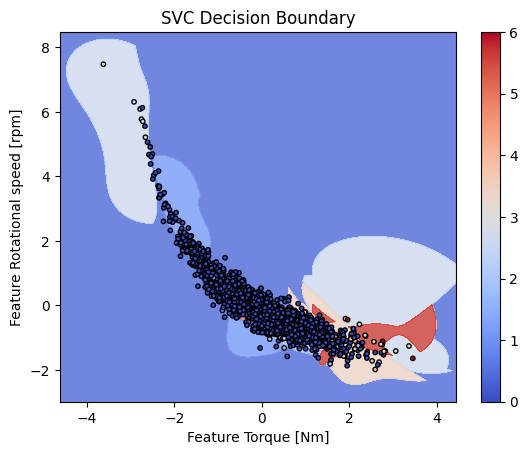

In [36]:
# Plot the decision boundary and the test points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test_selected.iloc[:, 0], X_test_selected.iloc[:, 1], c=y_test, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, s=10)
plt.xlabel(f'Feature {feature_indices[0]}')
plt.ylabel(f'Feature {feature_indices[1]}')
plt.title('SVC Decision Boundary')
plt.colorbar()
plt.show()

### With SMOTE

In [37]:
# Fit the model
svc_wrapper.fit(X_train, y_train, sampling_strategy="smote")

# Evaluate the model
_ = svc_wrapper.evaluate(X_test, y_test)

svc_multiclass_smote model fitted.
Accuracy for svc_multiclass_smote: 0.912
Classification Report for svc_multiclass_smote:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1930
           1       0.10      0.67      0.18         9
           2       0.69      0.86      0.77        21
           3       0.78      0.88      0.82        16
           4       0.72      0.81      0.76        16
           5       0.00      0.00      0.00         3
           6       0.67      0.80      0.73         5

    accuracy                           0.91      2000
   macro avg       0.56      0.70      0.60      2000
weighted avg       0.98      0.91      0.94      2000


Confusion Matrix for svc_multiclass_smote:
[[1769   53    8    3    4   93    0]
 [   2    6    0    0    1    0    0]
 [   3    0   18    0    0    0    0]
 [   2    0    0   14    0    0    0]
 [   1    0    0    0   13    0    2]
 [   3    0    0    0    0    0    0]
 [   0 

# SVM grid search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

In [39]:
# Define the parameter grid
# param_grid = {'C': np.logspace(0, 2, num=10)}
param_grid = {'C': np.linspace(50.0, 200.0, num=16), 
                  'kernel': ['rbf'],            # Specifies the kernel type to be used in the algorithm ('rbf' for non-linear decision boundaries)
    'gamma': ['scale'],           # Kernel coefficient; 'scale' uses 1 / (n_features * X.var()) as value
    'decision_function_shape': ['ovr'],  # One-vs-rest strategy for multiclass classification
    'class_weight': ['balanced'], # Adjusts weights inversely proportional to class frequencies
    'random_state': [95]  }

print(param_grid)

{'C': array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.,
       160., 170., 180., 190., 200.]), 'kernel': ['rbf'], 'gamma': ['scale'], 'decision_function_shape': ['ovr'], 'class_weight': ['balanced'], 'random_state': [95]}


In [40]:

# Initialize the SVC model
svc = SVC()

# Define the scoring metric. Here we use 'f1' but you can also use 'recall' or 'precision'
scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

# For precision-focused scoring, you could use:
# scorer = make_scorer(precision_score, average='macro')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'C': 190.0, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 95}
Best recall score:  0.5672307215329471


# Redes neuronales

Estas son exploradas en `neural_networks_testing.ipynb`.